# PyTorch 

First we start by installing PyTorch. I am working on a linux machine with a TESLA K-80 GPU (follow installation details explained here for other machines: http://pytorch.org)

In [2]:
!pip3 install torch torchvision

    100% |████████████████████████████████| 496.4MB 2.7kB/s 
    100% |████████████████████████████████| 51kB 8.5MB/s 
    100% |████████████████████████████████| 2.0MB 696kB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


# Introduction 

The main goal of this part is to familiarize with PyTorch and tensor computations (and interaction with numpy arrays).
First we start by importing the PyTorch library and check the compatibility with the GPU. 


In [4]:
# Import PyTorch
import torch as th
import numpy as np
import time


# Check if GPU is supported 
print(th.cuda.is_available())

True


We will show how to use PyTorch as an alternative for numpy to use the power of GPUs.

In [0]:
n = 3

x = th.FloatTensor(n).uniform_()
y = th.FloatTensor(n).uniform_()

In [6]:
x


 0.5192
 0.4931
 0.7591
[torch.FloatTensor of size 3]

In [7]:
y


 0.4605
 0.8194
 0.9945
[torch.FloatTensor of size 3]

In [13]:
print("Shape of tensor x : ",x.shape[0])

Shape of tensor x :  3


**From Numpy to PyTorch:** To move from a numpy array to a PyTorch tensor (PyTorch to numpy) we use the following functions

In [0]:
# Define a numpy array
A = np.ones((n, n))

# From numpy to PyTorch
A_th = th.from_numpy(A)
# Convert back to a numpy matrix
A_np = A_th.numpy()

In [25]:
print("Numpy Tensor:")
print(A_np)

print("\n PyTorch Tensor:")
A_th

Numpy Tensor:
[[ 1.  1.  1.]
 [ 1. 66.  1.]
 [ 1.  1.  1.]]

 PyTorch Tensor:



  1   1   1
  1  66   1
  1   1   1
[torch.DoubleTensor of size 3x3]

**Attention:** There is a reference from numpy to PyTorch. 

In [79]:
A[1,1] = 66
A_th


  1   1   1
  1  66   1
  1   1   1
[torch.DoubleTensor of size 3x3]

## GPU Support

In PyTorch it is easy to move from CPU to GPU (and back). Here is an example:

In [0]:

# cuda() method
gpu_tensor = A_th.cuda()


# call back to the CPU
cpu_tensor = gpu_tensor.cpu()

In [40]:
#No reference from numpy : 

A[1,1] = 99
gpu_tensor


  1   1   1
  1  66   1
  1   1   1
[torch.cuda.DoubleTensor of size 3x3 (GPU 0)]

# Comparing performances on matrix multiplication

This comparison is biaised (CPU for Numpy and GPU for PyTorch) but it gives us an overview of the speed up and perfromance we can get when working on GPUs using PyTorch.

In [0]:
def comparison(matrix_size):
  
  matrix_sizes = range(500,matrix_size,100)
  device_times = {
        "PyTorch-GPU":[],
        "Numpy-cpu":[]
    }
  
  for size in matrix_sizes:
    print("###############")

    print("Matrix size :",size)

    print("## Calculating on GPU using PyTorch ##")
    
    ######## define matrix :     
    
    Mat = np.random.rand(size,size)
    
    # Convert to Torch and GPU
    
    Mat_th = th.from_numpy(Mat)
    Mat_gpu = Mat_th.cuda()
    
    # Or directly in pytorch 
    # Mat = th.FloatTensor(size,size).uniform_()
    # Mat_gpu = Mat.cuda()
    
    
    ########## PyTorch computations  :
    
    start_time = time.time()
    
    results = th.matmul(Mat_gpu,Mat_gpu)
    
    time_taken = time.time() - start_time
    device_times['PyTorch-GPU'].append(time_taken)
    print("in (seconds): ",time_taken)
  
   ########## Numpy computations :
    print("## Calculating on CPU using Numpy ##")

   
    start_time = time.time() 
    results = np.matmul(Mat,Mat)
    time_taken = time.time() - start_time
    
    device_times['Numpy-cpu'].append(time_taken)
    print("in (seconds): ",time_taken)

  
  return device_times


In [87]:
matrix_size = 3500

results = comparison(matrix_size)

###############
Matrix size : 500
## Calculating on GPU using PyTorch ##
in (seconds):  0.00011277198791503906
## Calculating on CPU using Numpy ##
in (seconds):  0.011100530624389648
###############
Matrix size : 600
## Calculating on GPU using PyTorch ##
in (seconds):  0.00018787384033203125
## Calculating on CPU using Numpy ##
in (seconds):  0.018786907196044922
###############
Matrix size : 700
## Calculating on GPU using PyTorch ##
in (seconds):  0.0001926422119140625
## Calculating on CPU using Numpy ##
in (seconds):  0.0260770320892334
###############
Matrix size : 800
## Calculating on GPU using PyTorch ##
in (seconds):  0.00019359588623046875
## Calculating on CPU using Numpy ##
in (seconds):  0.038021087646484375
###############
Matrix size : 900
## Calculating on GPU using PyTorch ##
in (seconds):  0.00018906593322753906
## Calculating on CPU using Numpy ##
in (seconds):  0.06395220756530762
###############
Matrix size : 1000
## Calculating on GPU using PyTorch ##
in (second

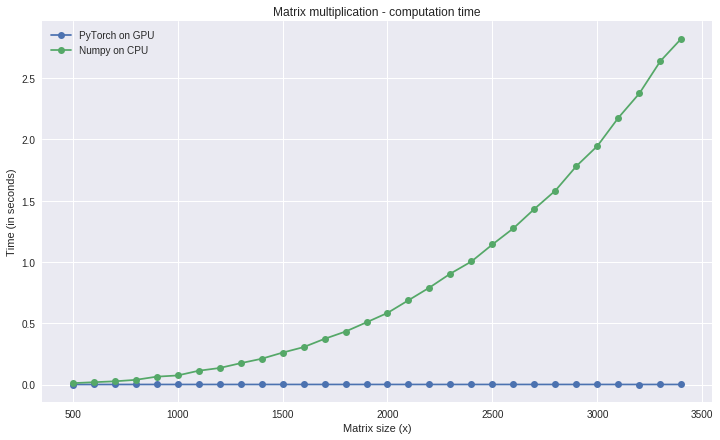

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

gpu_times = results["PyTorch-GPU"]
cpu_times = results["Numpy-cpu"]

xx = range(500,matrix_size,100)
plt.figure(figsize = (12,7))
plt.title('Matrix multiplication - computation time')
plt.plot(xx,gpu_times, 'o-', label = "PyTorch on GPU")
plt.plot(xx,cpu_times, 'o-', label = 'Numpy on CPU')
plt.ylabel('Time (in seconds)')
plt.xlabel('Matrix size (x)')
plt.legend()
plt.show()

It is clear that moving the computations to the GPU (with PyTorch) is much faster than classic Numpy. 

The PyTorch documentation: http://pytorch.org/docs/master/index.html


----

Imad El 